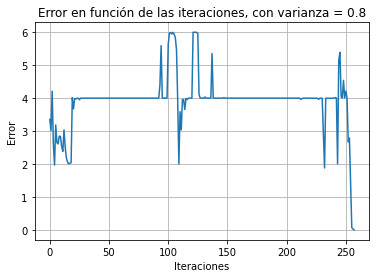

In [351]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del algoritmo
alpha = 0.99
mu = 0
var = 0.8
k = 1
T_max = 20
T_min = 1e-6
E_target = 1e-4
N = 4  # cantidad de neuronas en la capa oculta
size_X = 2  # cantidad de entradas

# Datos de entrada y salida esperada para la compuerta XOR
X = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
y_d = np.array([-1, 1, 1, -1])  # salida XOR

# Inicialización de los pesos sinápticos
W1 = np.random.normal(mu, var, (size_X, N))  # Pesos para la capa de entrada a oculta
W2 = np.random.normal(mu, var, (N, 1))  # Pesos para la capa oculta a salida
b1 = np.random.normal(mu, var, N)  # Sesgo de la capa oculta
b2 = np.random.normal(mu, var)  # Sesgo de la capa de salida

# Definir la función de activación
def tanh(x: np.ndarray) -> np.ndarray:
    return np.tanh(x)

# Función de propagación hacia adelante
def forward(x: np.ndarray, W1: np.ndarray, W2: np.ndarray, b1: np.ndarray, b2: float) -> float:
    z1 = np.dot(x, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = tanh(z2)
    return a2

# Cálculo del error
def calcular_error(y_d: np.ndarray, y_pred: np.ndarray) -> float:
    return 0.5 * np.sum((y_d - y_pred) ** 2)

# Algoritmo de Simulated Annealing
T = T_max  # temperatura inicial
E_vec = []

# Primer recorrido para inicializar el error
y_pred = np.array([forward(X[i], W1, W2, b1, b2) for i in range(len(X))])
E = calcular_error(y_d, y_pred.flatten())
E_vec.append(E)

# Bucle principal del algoritmo de recocido simulado
while E > E_target:
    # Generación de nuevas soluciones candidatas
    W1_ast = W1 + np.random.normal(0, var, W1.shape)
    W2_ast = W2 + np.random.normal(0, var, W2.shape)
    b1_ast = b1 + np.random.normal(0, var, b1.shape)
    b2_ast = b2 + np.random.normal(0, var)

    y_pred_ast = np.array([forward(X[i], W1_ast, W2_ast, b1_ast, b2_ast) for i in range(len(X))])
    E_ast = calcular_error(y_d, y_pred_ast.flatten())

    delta_E = E - E_ast

    # Aceptación de la nueva solución
    if delta_E > 0 or np.random.rand() < np.exp(-delta_E / (k * T)):
        W1, W2, b1, b2 = W1_ast, W2_ast, b1_ast, b2_ast
        E = E_ast

    E_vec.append(E)

    # Verificación de la temperatura mínima
    if T < T_min:
        print("No convergió, llegó a Tmin")
        break

    T *= alpha

# Gráfica del error en función de las iteraciones
plt.figure()
plt.plot(E_vec)
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Error en función de las iteraciones, con varianza = 0.8")
plt.grid(True)
plt.show()